In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

In [2]:
during_covid_df = pd.read_csv("../../CSVs/DuringCovid.csv")
pre_covid_df = pd.read_csv("../../CSVs/PreCovid.csv")
during_covid_g = pd.read_csv("../../CSVs/DuringCovid_g.csv")
pre_covid_g = pd.read_csv("../../CSVs/PreCovid_g.csv")

In [3]:
whole_time_period = pd.concat([pre_covid_df, during_covid_df])

In [4]:
whole_time_period.head()

,Parent Name,Area Name,Area Type,Sex,Category,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,NaN,England,England,Male,NaN,2017 - 19,15.500000,11145.0,Not compared,Not compared
1,NaN,England,England,Male,Most deprived decile (IMD2019),2017 - 19,16.233048,1055.0,Similar,Not compared
2,NaN,England,England,Male,Second most deprived decile (IMD2019),2017 - 19,16.681435,735.0,Similar,Not compared
3,NaN,England,England,Male,Third more deprived decile (IMD2019),2017 - 19,15.698346,979.0,Similar,Not compared
4,NaN,England,England,Male,Fourth more deprived decile (IMD2019),2017 - 19,15.485131,896.0,Similar,Not compared


In [5]:
whole_time_period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041 entries, 0 to 519
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Parent Name                               905 non-null    object 
 1   Area Name                                 1041 non-null   object 
 2   Area Type                                 1041 non-null   object 
 3   Sex                                       1041 non-null   object 
 4   Category                                  130 non-null    object 
 5   Time period                               1041 non-null   object 
 6   Value                                     1041 non-null   float64
 7   Count                                     1041 non-null   float64
 8   Compared to England value or percentiles  1041 non-null   object 
 9   Compared to Region value or percentiles   1041 non-null   object 
dtypes: float64(2), object(8)
memory usage

In [6]:
summary_area=whole_time_period.groupby(["Area Name", "Area Type", "Sex", "Time period"], as_index=False)["Value", "Count"].sum()

C:\Users\clair\AppData\Local\Temp\ipykernel_4252\1263200664.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary_area=whole_time_period.groupby(["Area Name", "Area Type", "Sex", "Time period"], as_index=False)["Value", "Count"].sum()


In [7]:
summary_area.head()

,Area Name,Area Type,Sex,Time period,Value,Count
0,Barking and Dagenham,Counties & UAs (from Apr 2021),Female,2019 - 21,3.646866,12.0
1,Barking and Dagenham,Counties & UAs (from Apr 2021),Male,2017 - 19,10.785675,26.0
2,Barking and Dagenham,Counties & UAs (from Apr 2021),Male,2019 - 21,14.630973,32.0
3,Barking and Dagenham,Counties & UAs (from Apr 2021),Persons,2017 - 19,6.066265,32.0
4,Barking and Dagenham,Counties & UAs (from Apr 2021),Persons,2019 - 21,8.816308,44.0


In [8]:
region_data = summary_area.loc[(summary_area["Area Type"] == "Region")]
region_data.head()

,Area Name,Area Type,Sex,Time period,Value,Count
219,East Midlands region,Region,Female,2017 - 19,4.649847,298.0
220,East Midlands region,Region,Female,2019 - 21,4.655702,301.0
221,East Midlands region,Region,Male,2017 - 19,14.633525,899.0
222,East Midlands region,Region,Male,2019 - 21,16.327489,1016.0
223,East Midlands region,Region,Persons,2017 - 19,9.515418,1197.0


In [9]:
whole_time_period.drop(whole_time_period.loc[whole_time_period['Sex']=="Persons"].index, inplace = True)

In [10]:
whole_time_period.head()

,Parent Name,Area Name,Area Type,Sex,Category,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,NaN,England,England,Male,NaN,2017 - 19,15.500000,11145.0,Not compared,Not compared
1,NaN,England,England,Male,Most deprived decile (IMD2019),2017 - 19,16.233048,1055.0,Similar,Not compared
2,NaN,England,England,Male,Second most deprived decile (IMD2019),2017 - 19,16.681435,735.0,Similar,Not compared
3,NaN,England,England,Male,Third more deprived decile (IMD2019),2017 - 19,15.698346,979.0,Similar,Not compared
4,NaN,England,England,Male,Fourth more deprived decile (IMD2019),2017 - 19,15.485131,896.0,Similar,Not compared


In [11]:
whole_time_region = whole_time_period.loc[(whole_time_period["Area Type"] == "Region")]
whole_time_region.head()

,Parent Name,Area Name,Area Type,Sex,Category,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
73,England,North East region,Region,Male,NaN,2017 - 19,19.098964,642.0,Worse,Not compared
74,England,North West region,Region,Male,NaN,2017 - 19,16.650761,1549.0,Worse,Not compared
75,England,Yorkshire and the Humber region,Region,Male,NaN,2017 - 19,18.330148,1275.0,Worse,Not compared
76,England,East Midlands region,Region,Male,NaN,2017 - 19,14.633525,899.0,Similar,Not compared
77,England,West Midlands region,Region,Male,NaN,2017 - 19,15.841810,1180.0,Similar,Not compared


In [12]:
region_m = region_data.loc[(region_data["Sex"] == "Male")].groupby("Area Name").mean()
region_f = region_data.loc[(region_data["Sex"] == "Female")].groupby("Area Name").mean()

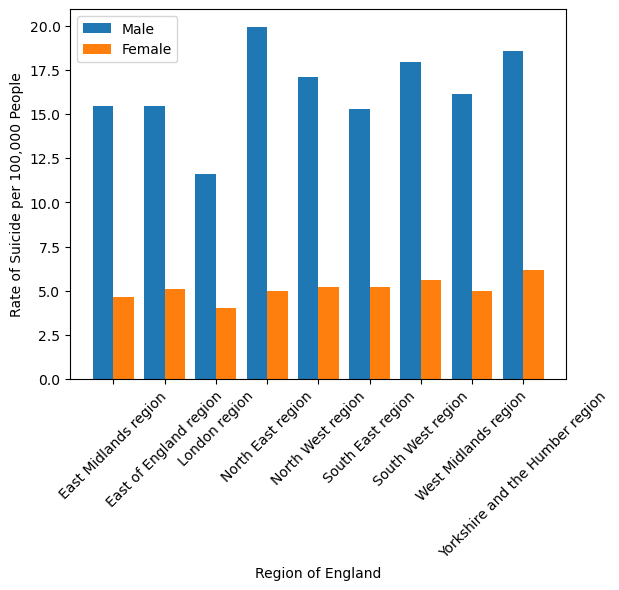

In [13]:
x_axis = np.arange(len(region_m.index))
  
plt.bar(x_axis - 0.2, region_m["Value"], 0.4, label = "Male")
plt.bar(x_axis + 0.2, region_f["Value"], 0.4, label = "Female")
  
plt.xticks(x_axis, region_m.index, rotation=45)
plt.xlabel("Region of England")
plt.ylabel("Rate of Suicide per 100,000 People")
plt.legend()
#plt.savefig("Output/RateComparisonWealth")
plt.show()

In [14]:
time_summary_m = region_data.loc[(region_data["Sex"] == "Male")].groupby("Time period").sum()
time_summary_f = region_data.loc[(region_data["Sex"] == "Female")].groupby("Time period").sum()

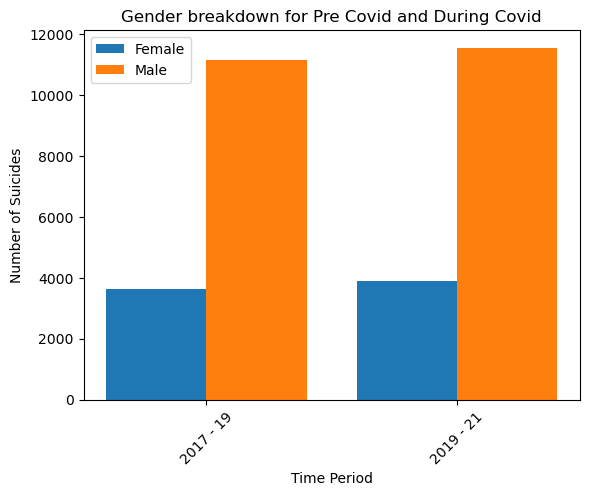

In [15]:
x_axis = np.arange(len(time_summary_m.index))
  
plt.bar(x_axis - 0.2, time_summary_f["Count"], 0.4, label = "Female")
plt.bar(x_axis + 0.2, time_summary_m["Count"], 0.4, label = "Male")
  
plt.xticks(x_axis, time_summary_m.index, rotation=45)
plt.xlabel("Time Period")
plt.ylabel("Number of Suicides")
plt.title("Gender breakdown for Pre Covid and During Covid")
plt.legend()
#plt.savefig("Output/RateComparisonWealth")
plt.show()

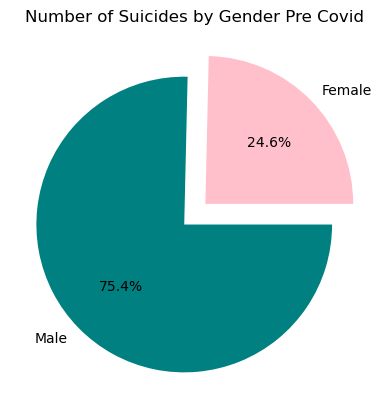

In [16]:
piePlot = pre_covid_g.groupby(["Sex"])["Count"].sum().reset_index(name="Count")
labs = piePlot["Sex"]
Count = piePlot["Count"]
explode = (0.1, 0.1)
colors = ["pink","teal"]
plt.pie(Count, explode=explode, labels=labs, colors=colors,autopct="%1.1f%%")
plt.title("Number of Suicides by Gender Pre Covid")

plt.show()

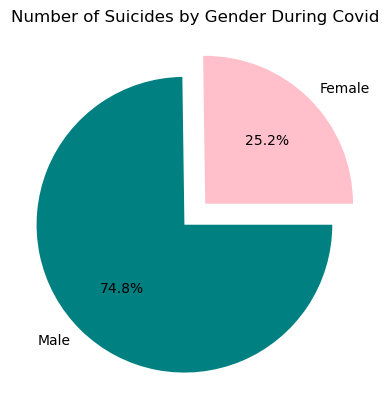

In [17]:
piePlot = during_covid_g.groupby(["Sex"])["Count"].sum().reset_index(name="Count")
labs = piePlot["Sex"]
Count = piePlot["Count"]
explode = (0.1, 0.1)
colors = ["pink","teal"]
plt.pie(Count, explode=explode, labels=labs, colors=colors,autopct="%1.1f%%")
plt.title("Number of Suicides by Gender During Covid")

plt.show()